<a href="https://colab.research.google.com/github/prajolshrestha/ANN-MNIST-Handwritten-Digit-Recognition-using-TensorFlow/blob/main/TF2_0_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
#load data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0
x_train.shape

(60000, 28, 28)

In [6]:
#making input 4D, as conv2D expects 4D data
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [8]:
#number of classes
k = len(set(y_train))
k

10

In [10]:
x_train[0].shape

(28, 28, 1)

In [11]:
#build a model

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)




In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 57s 29ms/step - loss: 0.5188 - accuracy: 0.8087 - val_loss: 0.3906 - val_accuracy: 0.8546
Epoch 2/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3573 - accuracy: 0.8670 - val_loss: 0.3613 - val_accuracy: 0.8603
Epoch 3/15
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3043 - accuracy: 0.8851 - val_loss: 0.3299 - val_accuracy: 0.8759
Epoch 4/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2729 - accuracy: 0.8967 - val_loss: 0.3071 - val_accuracy: 0.8905
Epoch 5/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2489 - accuracy: 0.9069 - val_loss: 0.2999 - val_accuracy: 0.8907
Epoch 6/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2233 - accuracy: 0.9152 - val_loss: 0.3043 - val_accuracy: 0.8945
Epoch 7/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2061 - accuracy: 0.9219 - val_loss: 0.2903 -

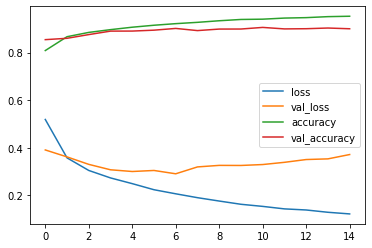

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3713 - accuracy: 0.9004


[0.3713224530220032, 0.9003999829292297]

In [35]:
p_test = model.predict(x_test).argmax(axis=1)
p_test

313/313 [==============================] - 3s 10ms/step


array([9, 2, 1, ..., 8, 1, 5])

Text(69.0, 0.5, 'True value')

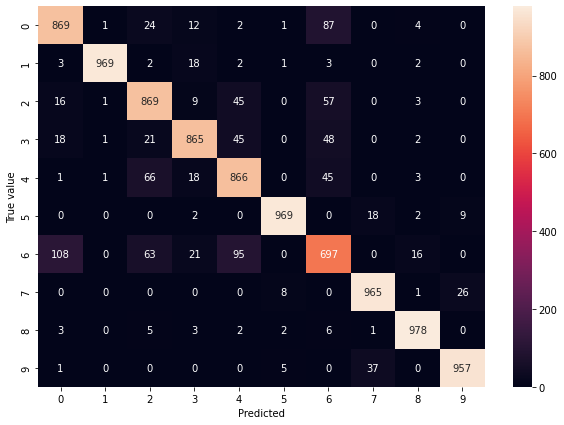

In [31]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=p_test)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, p_test)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True value')


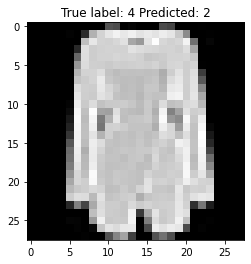

In [32]:
#show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s Predicted: %s' %(y_test[i], p_test[i]));